# Work with PyTorch Datasets
---

In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

---

## Custom dataset

### Creating of dataset
PyTorch provides easy mechanism to work with datasets. You just need to inherit from `torch.utils.data.Dataset` and override 2 methods:
 - `__len__` in a way that len(dataset) returns the size of the dataset.
 - `__getitem__` to support the indexing such that dataset[i] can be used to get ith sample

In [2]:
import numpy as np
import torch
from torch.utils.data import Dataset

In [3]:
class RandomVectorDataset(Dataset):
    """Random vector dataset."""
    
    def __init__(self, random_shape, transform=None):
        """
        Args:
            random_shape (list): Shape of random data in dataset
            transform (callable, optional): Optional transformation to be applied on a sample.
        """
        self.raw_data = np.random.randn(*random_shape)
        self.transform = transform
        
    def __len__(self):
        return self.raw_data.shape[0]
    
    def __getitem__(self, idx):
        sample = {'random_vector': self.raw_data[idx]}
        if self.transform:
            sample = self.transform(sample)
        return sample

In [4]:
random_vector_dataset = RandomVectorDataset(random_shape=[10, 5])

In [5]:
len(random_vector_dataset)

10

In [6]:
random_vector_dataset[5]

{'random_vector': array([-1.9352847 , -1.07148657, -0.9099617 , -0.36637514, -0.45520642])}

### Apply transformations to dataset
We can create objects with `__call__` method applying transforamtions to data from dataset. To put more transformations together, we can use `torchvision.transforms.Compose`. PyTorch provides multiple prepared  image transformations in ``torchvision.transforms`.

In [7]:
from torchvision.transforms import Compose

In [8]:
class Add2(object):
    def __call__(self, sample):
        return {'random_vector': sample['random_vector']+2}

class ToTorchTensor(object):
    def __call__(self, sample):
        return {'random_vector': torch.from_numpy(sample['random_vector'])}

In [9]:
transformations = Compose([Add2(), ToTorchTensor()])

In [10]:
random_vector_dataset = RandomVectorDataset(random_shape=[10, 5], transform=transformations)
random_vector_dataset[5]

{'random_vector': tensor([4.4668, 1.4999, 2.2086, 2.3261, 2.3823], dtype=torch.float64)}

### Sampling batches from dataset
PyTorch provides iterator `torch.utils.data.DataLoader` for work with datasets based on `torch.utils.data.Dataset` class.   
It enables
 - batching the data
 - shuffling the data  
 - load the data in parallel manner using multiprocessing workers


In [11]:
from torch.utils.data import DataLoader

In [12]:
data_loader = DataLoader(dataset=random_vector_dataset, batch_size=10, num_workers=1, shuffle=True)

In [13]:
next(iter(data_loader))

{'random_vector': tensor([[ 1.7224,  1.6407,  0.5754,  3.1440,  1.6395],
         [ 1.3135,  1.1337,  1.8053,  1.8325,  2.6125],
         [ 1.3071,  1.0198,  2.2153, -0.8398,  0.1463],
         [ 3.9502,  3.1598,  1.1194,  2.2383,  1.6644],
         [ 1.5446,  1.8790,  0.9264,  1.5265,  2.0886],
         [ 2.1064,  1.6949,  4.5015,  1.3617,  2.1817],
         [ 4.4668,  1.4999,  2.2086,  2.3261,  2.3823],
         [ 2.4300,  2.3690,  1.6764,  2.1137,  1.6756],
         [ 3.7477,  1.5340,  2.5698,  1.7171,  3.6486],
         [ 2.4137,  0.9302,  1.3243,  2.2522,  1.6215]], dtype=torch.float64)}

---

## Explore prepared dataset Fashion MNIST

In [14]:
import pandas as pd
from torchvision import datasets, transforms

In [15]:
transformations = transforms.Compose([transforms.ToTensor()])

### Training data

In [16]:
train_dataset = datasets.FashionMNIST('fm_data/', download=True, train=True, transform=transformations)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

In [17]:
train_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [18]:
len(train_dataset)

60000

In [19]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [20]:
next(iter(train_loader))

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

<Figure size 432x288 with 0 Axes>

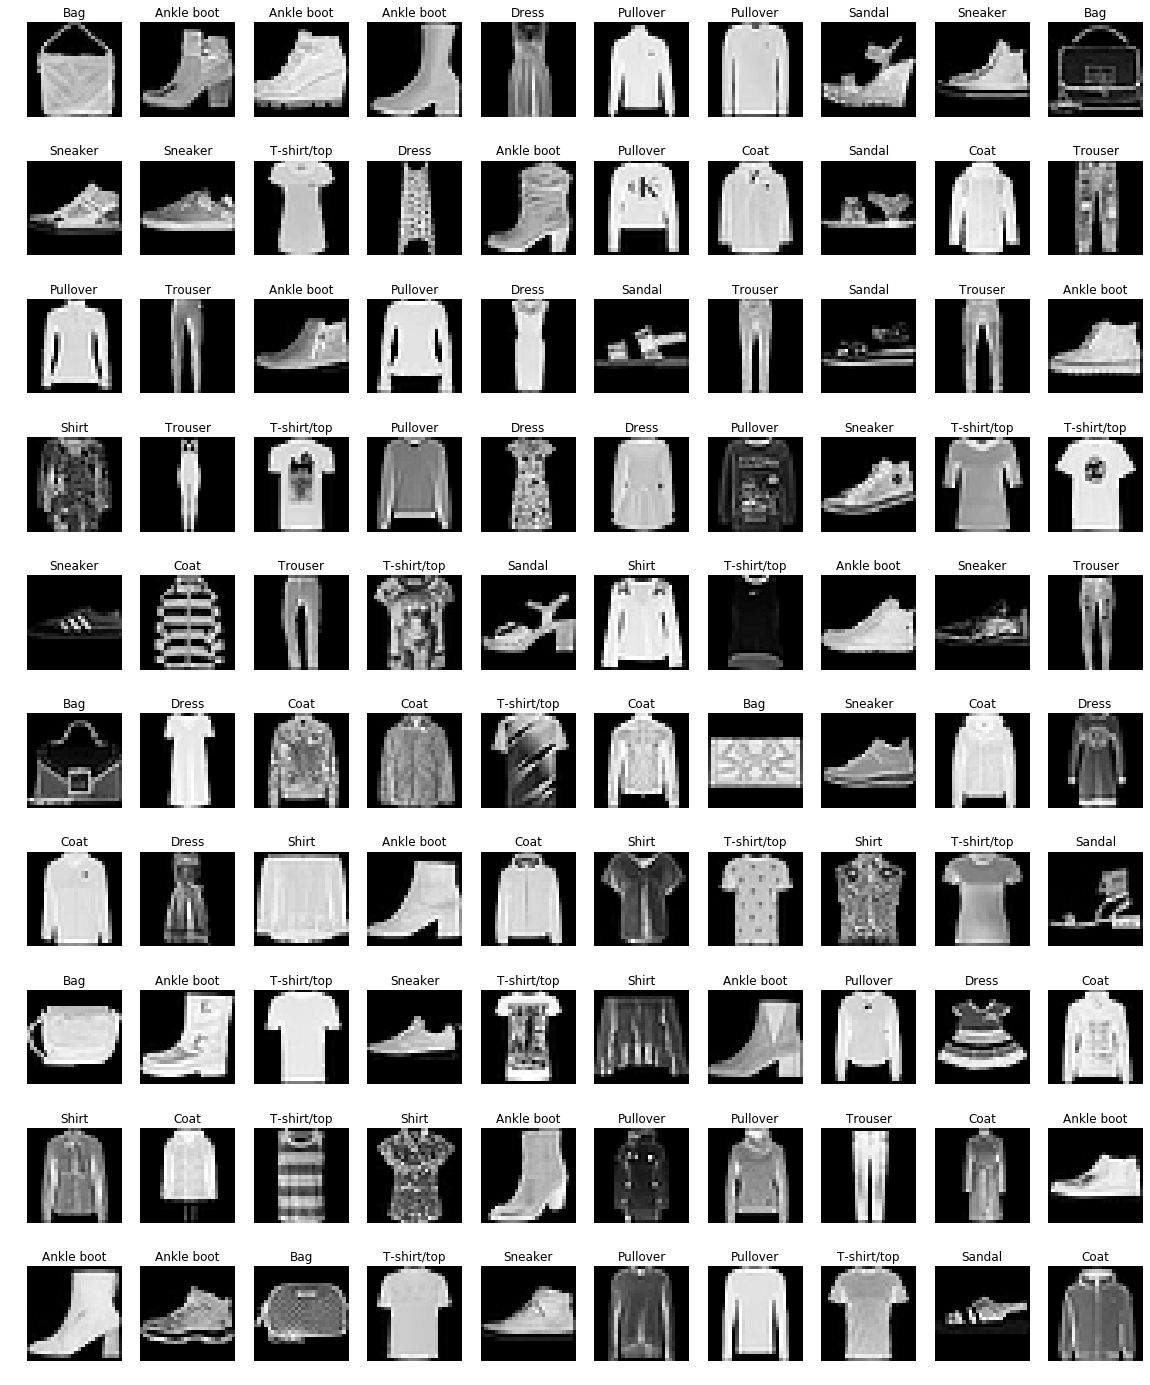

In [24]:
import matplotlib.pyplot as plt

plt.subplots_adjust(wspace=1.5, hspace=2.5)
fig = plt.figure(figsize=(20,25))

img_batch, label_batch = next(iter(train_loader))
img_batch = img_batch.squeeze(dim=1).numpy()
label_batch = label_batch.numpy()
for img_id in range(100):
    ax = plt.subplot(10, 10, img_id+1)
    img = img_batch[img_id]
    
    class_id = label_batch[img_id]
    class_name = train_dataset.classes[class_id]
    ax.imshow(img , cmap='gray')
    ax.set_title(class_name)
    ax.axes.set_axis_off()

### Validation data

In [25]:
from image_processing_workshop.visual import plot_image

In [26]:
valid_dataset = datasets.FashionMNIST('fm_data/', download=True, train=False, transform=transformations)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=64, shuffle=False)

In [27]:
len(valid_dataset)

10000

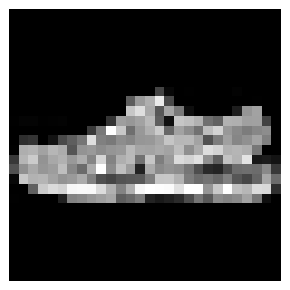

In [29]:
plot_image(valid_dataset[21][0], figsize=(5, 5))

In [30]:
labels = valid_dataset.targets
class_names = list(map(lambda class_id: valid_dataset.classes[class_id], labels))
df = pd.DataFrame({'class_names': class_names, 'class_ids': labels})
df.head(10)

,class_names,class_ids
0,Ankle boot,9
1,Pullover,2
2,Trouser,1
3,Trouser,1
4,Shirt,6
5,Trouser,1
6,Coat,4
7,Shirt,6
8,Sandal,5
9,Sneaker,7


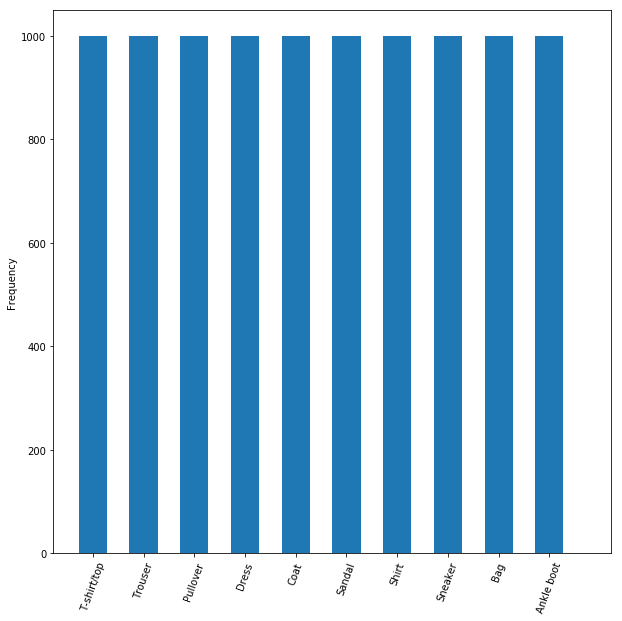

In [33]:
fig = plt.figure(figsize=(10, 10))
df.loc[:,'class_ids'].plot(kind='hist', width=0.5)
ax = plt.gca()
ax_ticks = ax.xaxis.set_ticks(np.arange(0.25, 9, 0.9))
ax_labels = ax.xaxis.set_ticklabels(list(valid_dataset.classes), rotation=70)